#  <u><center> Anime Recommendation System </center>
<center> CISB Natural Language Processing </center>
<center> Prof. Sohair Zaki</center>
<center> Final Project </center>
<center> by Joseph Nguyen </center>

For this final project, I will be using a Kaggle dataset
Kaggle site: [Anime Data](https://www.kaggle.com/datasets/arnavvvvv/anime-dataset)

- This dataset contains information about Anime. There are over 16,000 animes. I will be specifically focusing on animes.csv.
- animes.csv contains a list of animes with:
    - uid, Unique Anime ID (int)
    - title (string)
    - synopsis, quick summary of the show (string)
    - genre, a list of genres that the show is a part of (string)
    - aired, when the show aired and ended (string)
    - episodes, number of episodes (float)
    - members, number of people invested in show (int)
    - popularity (int)
    - ranked (float)
    - score, overall reviewer score about how good the show is (float)
    - image_url (object)
    - link, a link to [MyAnimeList](https://myanimelist.net/) (string)
- What does each row in this dataset represent? Each row in the dataset is an anime show.
- Subject Area: Entertainment

## <U> Exploratory Data Analysis EDA </u>
## Data Setup

In [118]:
#import needed libraries
import numpy as np #work with arrays
import pandas as pd #working with datasets
import matplotlib.pyplot as plt #data visualization
import warnings #handle error label
import seaborn as sns #quick, aesthetic visualization


import scipy.stats as stats#statistical functions for descriptive and inferential analysis.

#performs the necessary behind-the-scenes setup for data visualization
%matplotlib inline 

#set sns style to darkgrid
sns.set_style("darkgrid")

#ignore warnings
warnings.filterwarnings("ignore")

#import needed libaries for tokenization
from nltk.tokenize import RegexpTokenizer

In [309]:
#import data
dfAnime = pd.read_csv('data/animes.csv')

#print dataframe
dfAnime

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...,...,...,...,...,...,...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...


In [120]:
#preview of first 6 rows
dfAnime.head(6)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...
5,37510,Mob Psycho 100 II,"Shigeo ""Mob"" Kageyama is now maturing and unde...","['Action', 'Slice of Life', 'Comedy', 'Superna...","Jan 7, 2019 to Apr 1, 2019",13.0,442310,176,21.0,8.89,https://cdn.myanimelist.net/images/anime/1918/...,https://myanimelist.net/anime/37510/Mob_Psycho...


In [121]:
#reveal last 6 rows
dfAnime.tail(6)

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
19305,4177,Bounen no Xamdou,Sentan Island is a small island surrounded by ...,"['Action', 'Military', 'Sci-Fi']","Jul 15, 2008 to Feb 4, 2009",26.0,108496,1028,1067.0,7.73,https://cdn.myanimelist.net/images/anime/2/231...,https://myanimelist.net/anime/4177/Bounen_no_X...
19306,32979,Flip Flappers,Cocona is an average middle schooler living wi...,"['Sci-Fi', 'Adventure', 'Comedy', 'Magic']","Oct 6, 2016 to Dec 29, 2016",13.0,134252,843,1070.0,7.73,https://cdn.myanimelist.net/images/anime/4/822...,https://myanimelist.net/anime/32979/Flip_Flappers
19307,123,Fushigi Yuugi,"While visiting the National Library, junior-hi...","['Adventure', 'Fantasy', 'Magic', 'Martial Art...","Apr 6, 1995 to Mar 28, 1996",52.0,84407,1292,1071.0,7.73,https://cdn.myanimelist.net/images/anime/2/201...,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,1281,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","['Mystery', 'Horror', 'Supernatural']","Oct 22, 2000 to Mar 25, 2001",19.0,83093,1314,1073.0,7.73,https://cdn.myanimelist.net/images/anime/9/183...,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,450,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"['Action', 'Adventure', 'Comedy', 'Historical'...","Dec 21, 2002",1.0,71989,1469,1077.0,7.73,https://cdn.myanimelist.net/images/anime/1162/...,https://myanimelist.net/anime/450/InuYasha_Mov...
19310,87,Mobile Suit Gundam: Char's Counterattack,The year is Universal Century 0093. Char Aznab...,"['Military', 'Sci-Fi', 'Space', 'Drama', 'Mecha']","Mar 12, 1988",1.0,29248,2604,1081.0,7.73,https://cdn.myanimelist.net/images/anime/1523/...,https://myanimelist.net/anime/87/Mobile_Suit_G...


In [122]:
#display some info about dataset
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [123]:
#look at column datatypes
dfAnime.dtypes

uid             int64
title          object
synopsis       object
genre          object
aired          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
img_url        object
link           object
dtype: object

In [124]:
#display number of rows and columns
rows, cols = dfAnime.shape
print("Rows: ", rows)
print("Columns: ", cols)

Rows:  19311
Columns:  12


A majority of these columns are an object type, or are strings. There is no categorical data. The columns ranked, popularity, and members are interesting columns because there is no idea as to what the basis for each value is and how updated it is.

## Data Cleaning and Organizing

In [127]:
dfAnime.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

There are some columns that have information that we do not need. This includes: "uid", "genre", "popularity", "ranked", "img_url", and "link"

In [129]:
#drop irrelevant colums
dfAnime.drop(['uid','genre','episodes','popularity','ranked','img_url'], axis = 1, inplace = True)

#display updated dataset
dfAnime

,title,synopsis,aired,members,score,link
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"Oct 4, 2015 to Mar 27, 2016",489888,8.82,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"Oct 10, 2014 to Mar 20, 2015",995473,8.83,https://myanimelist.net/anime/23273/Shigatsu_w...
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"Jul 7, 2017 to Sep 29, 2017",581663,8.83,https://myanimelist.net/anime/34599/Made_in_Abyss
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","Apr 5, 2009 to Jul 4, 2010",1615084,9.23,https://myanimelist.net/anime/5114/Fullmetal_A...
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"Jan 6, 2017",214621,8.83,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...,...,...,...,...
19306,Flip Flappers,Cocona is an average middle schooler living wi...,"Oct 6, 2016 to Dec 29, 2016",134252,7.73,https://myanimelist.net/anime/32979/Flip_Flappers
19307,Fushigi Yuugi,"While visiting the National Library, junior-hi...","Apr 6, 1995 to Mar 28, 1996",84407,7.73,https://myanimelist.net/anime/123/Fushigi_Yuugi
19308,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...","Oct 22, 2000 to Mar 25, 2001",83093,7.73,https://myanimelist.net/anime/1281/Gakkou_no_K...
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,"Dec 21, 2002",71989,7.73,https://myanimelist.net/anime/450/InuYasha_Mov...


In [130]:
dfAnime.columns

Index(['title', 'synopsis', 'aired', 'members', 'score', 'link'], dtype='object')

The 'aired' column has information about the anime's release airing dates. I am only interested in the release year, so i will implement a regular expression function to match with the starting year. This match will then be used to populate a new column 'Release Year'

**Re**
- module used for regular expressions
- Regex (regular expressions) are a sequence of characters that define a search pattern. Mainly used for string matching and manipulation

In [133]:
#needed library - working with regular expressions
import re

matchPattern = re.compile(r"\b(\d{4})\b")

#write a function to match regular expression patterns
def find_pattern(text, pattern):
    match = pattern.search(text)
    if match:
        return match.group(1)
    else:
        return None

In [134]:
print(find_pattern("Oct 4, 2015 to Mar 27, 2016", matchPattern))

2015


In [135]:
#apply find_pattern function to 'aired' column and store results in a new column
dfAnime['release year'] = dfAnime['aired'].apply(lambda entry: find_pattern(entry, matchPattern))

#ouput updated dataset
dfAnime['release year']

0        2015
1        2014
2        2017
3        2009
4        2017
         ... 
19306    2016
19307    1995
19308    2000
19309    2002
19310    1988
Name: release year, Length: 19311, dtype: object

In [136]:
#drop irrelevant colums
dfAnime.drop(['aired'], axis = 1, inplace = True)

#output updated result
dfAnime

,title,synopsis,members,score,link,release year
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,8.82,https://myanimelist.net/anime/28891/Haikyuu_Se...,2015
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,8.83,https://myanimelist.net/anime/23273/Shigatsu_w...,2014
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,8.83,https://myanimelist.net/anime/34599/Made_in_Abyss,2017
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,9.23,https://myanimelist.net/anime/5114/Fullmetal_A...,2009
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,8.83,https://myanimelist.net/anime/31758/Kizumonoga...,2017
...,...,...,...,...,...,...
19306,Flip Flappers,Cocona is an average middle schooler living wi...,134252,7.73,https://myanimelist.net/anime/32979/Flip_Flappers,2016
19307,Fushigi Yuugi,"While visiting the National Library, junior-hi...",84407,7.73,https://myanimelist.net/anime/123/Fushigi_Yuugi,1995
19308,Gakkou no Kaidan,"Years ago, all of the ghosts in a haunted scho...",83093,7.73,https://myanimelist.net/anime/1281/Gakkou_no_K...,2000
19309,InuYasha Movie 2: Kagami no Naka no Mugenjo,Inuyasha and company have finally destroyed Na...,71989,7.73,https://myanimelist.net/anime/450/InuYasha_Mov...,2002


now let us look at the dataset's missing values

In [138]:
#missing value count
print("Missing Value Count: ")
print(dfAnime.isnull().sum())

print("Missing Value Distribution: ")
#missing value distribution
print(dfAnime.isnull().mean())

Missing Value Count: 
title             0
synopsis        975
members           0
score           579
link              0
release year    372
dtype: int64
Missing Value Distribution: 
title           0.000000
synopsis        0.050489
members         0.000000
score           0.029983
link            0.000000
release year    0.019264
dtype: float64


In [139]:
dfAnime = dfAnime.dropna(subset=['synopsis','score','release year'])

In [140]:
#missing value count
print("Missing Value Count: ")
print(dfAnime.isnull().sum())

print("Missing Value Distribution: ")
#missing value distribution
print(dfAnime.isnull().mean())

Missing Value Count: 
title           0
synopsis        0
members         0
score           0
link            0
release year    0
dtype: int64
Missing Value Distribution: 
title           0.0
synopsis        0.0
members         0.0
score           0.0
link            0.0
release year    0.0
dtype: float64


In [141]:
#keep track of size of the Dataframe
#display number of rows and columns
rows, cols = dfAnime.shape
print("Rows: ", rows)
print("Columns: ", cols)

Rows:  17775
Columns:  6


In [142]:
## Drop duplicate titles, keeping only the first occurrence
dfAnime = dfAnime.drop_duplicates(subset = 'title', keep = 'first').reset_index(drop = True)

In [143]:
#keep track of size of the Dataframe
#display number of rows and columns
rows, cols = dfAnime.shape
print("Rows: ", rows)
print("Columns: ", cols)

Rows:  15071
Columns:  6


Since duplicates are dropped, we can see that a lot the number of rows has decreased.

In [145]:
#display a single row entry from dfAnime synopsis column
dfAnime['synopsis'][4]

'After helping revive the legendary vampire Kiss-shot Acerola-orion Heart-under-blade, Koyomi Araragi has become a vampire himself and her servant. Kiss-shot is certain she can turn him back into a human, but only once regaining her full power.  \r\n \r\nAraragi has hunted down the three vampire hunters that defeated Kiss-shot and retrieved her limbs to return her to full strength. However, now that Araragi has almost accomplished what he’s been fighting for this whole time, he has to consider if this is what he really wants. Once he revives this powerful immortal vampire, there is no telling what she might do, and there would be no way of stopping her. \r\n \r\nBut there is more to the story that Araragi doesn’t understand. If a newborn vampire like him could defeat the hunters, how did they overpower Kiss-shot? Can he trust her to turn him back to a human? And how is that even possible in the first place? \r\n \r\nAraragi is at his limit but he must come to a decision, and it may not

I am noticing that some entries within the 'synopsis' column have portions of the text that include potential escape sequences or notes. This is not necessary to keep within the texts, so a regular expression will be used to extract these errors. 

In [147]:
# Remove instances of \r\n and any text within brackets
deleteMatch = re.compile(r'\r\n|\[.*?\]')

# Remove instances of any doubel or triple spaces
deleteSpaces = re.compile(r'\s+')

In [148]:
#write a function to match regular expression and replace
def clean_text(text, pattern, replace):
    cleaned = re.sub(pattern, replace, text)
    return cleaned

In [149]:
#apply find_pattern function to 'aired' column and store results in a new column
dfAnime['synopsis'] = dfAnime['synopsis'].apply(lambda entry: clean_text(entry,deleteMatch, ""))

#ouput updated dataset
dfAnime['synopsis'][0]

"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead.   When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks.   Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru Oik

In [150]:
#apply find_pattern function to 'aired' column and store results in a new column
dfAnime['synopsis'] = dfAnime['synopsis'].apply(lambda entry: clean_text(entry, deleteSpaces, " "))

#ouput updated dataset of row one
dfAnime['synopsis'][0]

"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks. Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru Oikawa.

In [151]:
dfAnime.dtypes

title            object
synopsis         object
members           int64
score           float64
link             object
release year     object
dtype: object

In [152]:
dfAnime.columns

Index(['title', 'synopsis', 'members', 'score', 'link', 'release year'], dtype='object')

In [153]:
#change datatype
dfAnime['release year'] = dfAnime['release year'].astype('int64')#years can be an int value

#display new datatypes
dfAnime.dtypes

title            object
synopsis         object
members           int64
score           float64
link             object
release year      int64
dtype: object

### Exploratory Analysis

<u> What is the count of anime's in relation to release year? </u> Getting an understanding of the quantity per year can potentially identify patterns or interesting conclusions.

In [156]:
#use 'release year' column to count unique values
dfAnime['release year'].value_counts()

release year
2016    832
2014    811
2017    803
2015    745
2018    742
       ... 
1937      1
1944      1
1953      1
1951      1
1955      1
Name: count, Length: 99, dtype: int64

We can use a countplot to see the count of each year

Text(0.5, 1.0, 'Countplot of Animes in relation to release year')

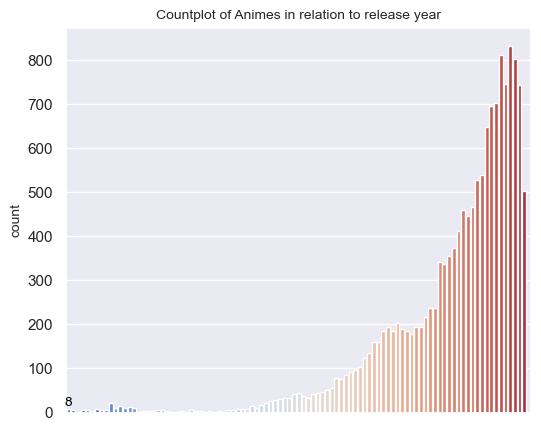

In [158]:
#set plot size
plt.rcParams['figure.figsize'] = [6,5]

#set content, font scale/size
sns.set_context("notebook", font_scale = 1, rc={"font.size" : 10,"axes.titlesize" : 10,"axes.labelsize" : 10})

#use sns countplot
ax = sns.countplot(data = dfAnime, x = "release year", palette = 'coolwarm')

#show Y values
ax.bar_label(ax.containers[0], label_type = 'edge', color = 'Black')

#so many X values that it eventually clutters the bottom
plt.gca().axes.get_xaxis().set_visible(False)

#show title
plt.title("Countplot of Animes in relation to release year")

In [159]:
#list of all unique values within release year column
dfAnime['release year'].unique()

array([2015, 2014, 2017, 2009, 2019, 2001, 2008, 2016, 2013, 2006, 2012,
       2010, 2005, 1977, 2003, 1999, 2007, 2018, 1986, 2004, 1978, 2011,
       1997, 1998, 2002, 1989, 1992, 1993, 2000, 1994, 1988, 1996, 1983,
       1984, 1985, 1987, 1982, 1995, 1990, 1970, 1979, 1980, 1991, 1981,
       1971, 1966, 1976, 1967, 1959, 1974, 1969, 1968, 1965, 1973, 1962,
       1964, 1932, 1975, 1963, 1972, 1943, 1917, 1933, 1956, 1958, 1961,
       1948, 1941, 1930, 1931, 1935, 1957, 1947, 1926, 1960, 1918, 1929,
       1927, 1946, 1925, 1954, 1940, 1939, 1934, 1928, 1942, 1936, 1938,
       1944, 1950, 1924, 1945, 1952, 1949, 1937, 2020, 1953, 1951, 1955],
      dtype=int64)

This graph makes sense considering that Anime become more prominent as the years continued. There is a drastic difference with the amount of animes that were released in 1955 compared to 2016. Anime was not as popular back then as it is now. Despite this, the count plot suffers from too many X values that make the graph difficult to read. It may be better to group decades together. Let us create a new column to categorize each decade: 
- 1910's: (1917 - 1919)
- 1920's: (1920-1929)
- 1930's: (1930-1939)
- 1940's: (1940-1949)
- 1950's: (1950-1959)
- 1960's: (1960-1969)
- 1970's: (1970-1979)
- 1980's: (1980-1989)
- 1990's: (1990-1999)
- 2000's: (2000-2009)
- 2010's: (2010-2019)
- 2020's: (2020-2020)

In [161]:
#define a function to categorize the release year into appropriate decade
def decadeGroup(code):
    if(code <= 1919):
        return "1910's"
    elif(code >= 1920 and code <= 1929):
        return "1920's"
    elif(code >= 1930 and code <= 1939):
        return "1930's"
    elif(code >= 1940 and code <= 1949):
        return "1940's"
    elif(code >= 1950 and code <= 1959):
        return "1950's"
    elif(code >= 1960 and code <= 1979):
        return "1960's"
    elif(code >= 1980 and code <= 1989):
        return "1980's"
    elif(code >= 1990 and code <= 1999):
        return "1990's"
    elif(code >= 2000 and code <= 2009):
        return "2000's"
    elif(code >= 2010 and code <= 2019):
        return "2010's"
    elif(code == 2020):
        return "2020's"

#apply the function to 'release year' column 
dfAnime['decade'] = dfAnime['release year'].apply(decadeGroup)
dfAnime.head()

,title,synopsis,members,score,link,release year,decade
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,8.82,https://myanimelist.net/anime/28891/Haikyuu_Se...,2015,2010's
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,8.83,https://myanimelist.net/anime/23273/Shigatsu_w...,2014,2010's
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,8.83,https://myanimelist.net/anime/34599/Made_in_Abyss,2017,2010's
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,9.23,https://myanimelist.net/anime/5114/Fullmetal_A...,2009,2000's
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,8.83,https://myanimelist.net/anime/31758/Kizumonoga...,2017,2010's


In [162]:
#change datatype
dfAnime['decade'] = dfAnime['decade'].astype('category')

#display new dataframe
dfAnime.dtypes

title             object
synopsis          object
members            int64
score            float64
link              object
release year       int64
decade          category
dtype: object

In [163]:
#use 'decade' column to count unique values
dfAnime['decade'].value_counts()

decade
2010's    7019
2000's    3953
1990's    1976
1980's    1214
1960's     696
1930's      93
1950's      41
1940's      33
1920's      30
1910's      14
2020's       2
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot of Animes in relation to decade')

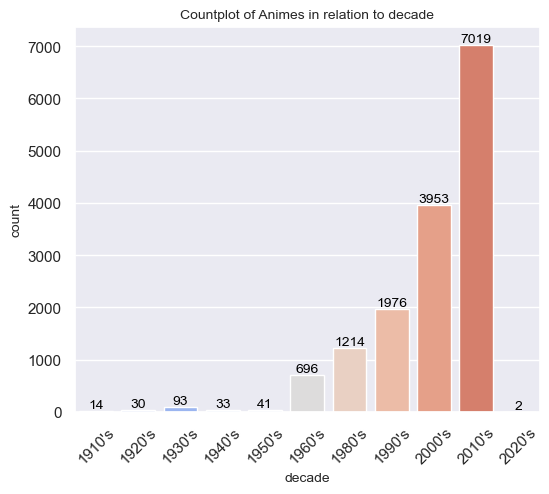

In [164]:
#set plot size
plt.rcParams['figure.figsize'] = [6,5]

#set content, font scale/size
sns.set_context("notebook", font_scale = 1, rc={"font.size" : 10,"axes.titlesize" : 10,"axes.labelsize" : 10})

#use sns countplot
ax = sns.countplot(data = dfAnime, x = "decade", palette = 'coolwarm')

#Change 45 to the desired rotation angle
plt.xticks(rotation=45)

#show Y values
ax.bar_label(ax.containers[0], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[1], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[2], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[3], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[4], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[5], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[6], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[7], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[8], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[9], label_type = 'edge', color = 'Black')
ax.bar_label(ax.containers[10], label_type = 'edge', color = 'Black')


#show title
plt.title("Countplot of Animes in relation to decade")

Similar to the countplot that counted number of animes per year, this countplot supports the idea that anime releases have been increasing drastically over the years. A peculiar consideration is the amount of animes that were released in the 2020's. This does not make sense because I know for a fact that there was more than 2 animes that released in 2020's. This could potentially be related to the dataset not having updated information. 

<u> What is the lowest score? What is the highest score? What is the average score?

In [167]:
print("Lowest score: ", dfAnime['score'].min())

print("Highest score: ", dfAnime['score'].max())

print(f"Average score: {dfAnime['score'].mean():.2f}")

Lowest score:  1.25
Highest score:  9.23
Average score: 6.36


In [168]:
#print row with lowest score
print(dfAnime.loc[dfAnime['score'].idxmin()])

#differentiate between two rows
print()

#print row with highest score
print(dfAnime.loc[dfAnime['score'].idxmax()])

title                                        Phantomi: Mini Anime
synopsis        A simplistic chibi anime side-stories to the t...
members                                                        62
score                                                        1.25
link            https://myanimelist.net/anime/40316/Phantomi__...
release year                                                 2019
decade                                                     2010's
Name: 11153, dtype: object

title                            Fullmetal Alchemist: Brotherhood
synopsis        "In order for something to be obtained, someth...
members                                                   1615084
score                                                        9.23
link            https://myanimelist.net/anime/5114/Fullmetal_A...
release year                                                 2009
decade                                                     2000's
Name: 3, dtype: object


From the results, we can see that the lowest score is associated with the anime 'Phantomi: Mini Anime" which has a score of 1.25. The highest score from the dataset is associated with "Fullmetal Alchemist: Brotherhood", which has a score of 9.23. The average score amongst all entries was 6.36

We can create a pivot table to display the minimum, maxmium, and average score values for each decade

In [171]:
pd.pivot_table(data = dfAnime, index = 'decade', values = 'score', aggfunc = ['min', 'max', 'mean'])

,min,max,mean
,score,score,score
decade,,,
1910's,4.63,6.46,5.708571
1920's,4.60,7.31,5.431000
1930's,3.81,6.54,5.094409
1940's,4.37,7.12,5.468788
1950's,3.97,6.76,5.581951
1960's,2.75,8.35,5.813348
1980's,3.37,9.03,6.208954
1990's,2.84,8.88,6.356301


The minimum and maximum scores for each decade tend to fluctuate. There is no clear pattern that can be discerned easily amongst the min and max scores. Something that I found very interesting, however, is the steady increase of average scores as the decades increase. 

Text(0.5, 1.0, 'Violinplot of \nScore in relation to decade')

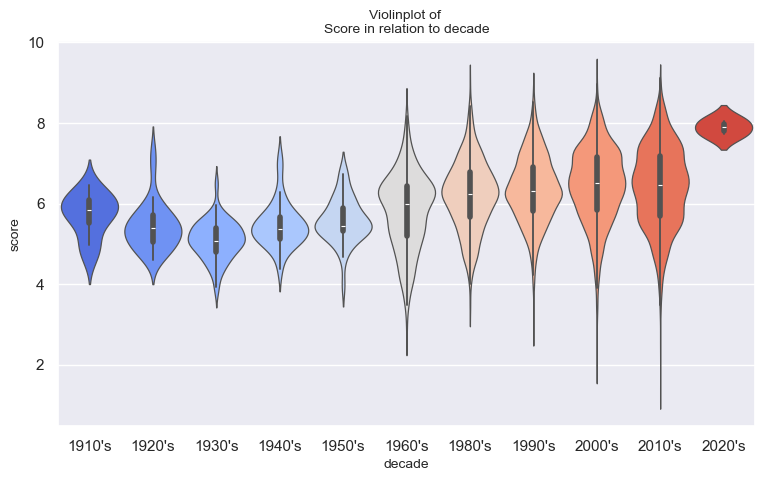

In [173]:
#configure plot size
plt.figure(figsize = (9,5))

#plot a violinplot
sns.violinplot(data = dfAnime, x = 'decade', y = 'score', palette = 'coolwarm', width = 0.9, linewidth = 0.9, saturation = 1)

#add title to label plot
plt.title("Violinplot of \nScore in relation to decade")

A violin plot provides a statistical summary of numeric values across different groups. TIt provides information such as median, max, min, and outliers. The violinplot can also show how data is dispersed through density curves. The width of each curve corresponds with the approximate frequency of data points in each region. The wider it is, the more frequent data points within that region are.
The violinplot helps confirm what we checked with the pivot table before. It appears that the width is wider around the median. This makes sense considering frequent values can impact the average.in with.

Is there a correlation between an Anime's score and the number of members that the anime has?

correlation is related to statistical measures that determine the linear relationship between two variables. The correlation value ranges from -1 to 1. 1 represents perfect positive correlation; this implies that if one variable goes up, then the other will go up and vice versa. -1 represents perfect negative correlation. This implies that as one variable increases, then the other will descrease, and vice versa. 0 simply represents that there is no correlation present between the two.

In [177]:
dfAnime[['score','members']].corr()[:1]

,score,members
score,1.0,0.397423


The correlation between the two is 0.397. This implies that there is somewhat of a correlation. A regplot can be used to identify the relationship between the two variables. this plot will include details by utilizing a scatterplot and a linear regression fit line.

Text(0, 0.5, 'members')

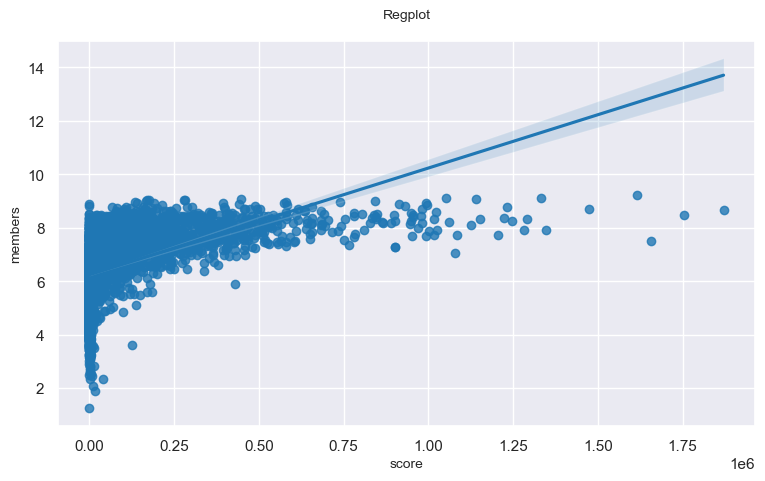

In [179]:
#configure size
plt.figure(figsize = (9,5))

#set up joint plot
_ = sns.regplot(data = dfAnime, y ='score', x ='members')

#annotate
plt.title("Regplot\n")
plt.xlabel("score")
plt.ylabel("members")

The regplot shows that a positive linear correlation exists. We can confirm this by employing a hypothesis time if there is a relationship between score and members. 

- if P-value is < 0.001: strong evidence that the correlation is significant.
- if P-value is < 0.05: moderate evidence that the correlation is significant.
- if P-value is < 0.1: weak evidence that the correlation is significant.
- if P-value is > 0.1: no evidence that the correlation is significant.

In [181]:
#show pearson coefficient and P-value
pearson_coef, p_value = stats.pearsonr(dfAnime['members'], dfAnime['score'])
print("P- value: ", p_value)

P- value:  0.0


In [182]:
#define function to interpet results
def interpretCorr(pval):
    if(pval < 0.001):
        print("\tStrong evidence that the correlation is significant")
    elif(pval > 0.001 and pval < .05):
        print("\tModerate evidence that the correlation is significant")
    elif (pval > .05 and pval < .1):
        print("\tWeak evidence that the correlation is significant")
    else:
        print("\tNo evidence that the correlation is significant")

In [183]:
#interpret pvalue
print("Correlation between members and score")
interpretCorr(p_value)

Correlation between members and score
	Strong evidence that the correlation is significant


The correlation between members and score is significant enough the consider. The p-value was less than .001, and the regplot displayed a positive correlation. 

## <u> NLP library </u>
**SpaCy**
-  free, open-source library for advanced Natural Language Processing (NLP) in Python
-  a tool that works with text. It helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems, or to pre-process text for deep learning.
-  since computers cannot understand text, SpaCy can be used: break down text into individual pieces, add meaning to words, and help organize or analyze text

In [186]:
#import library
import spacy

In [187]:
#load small trained langauge model
# small English pipeline trained on written web text that includes
#vicabulary, syntax, and entities
nlp = spacy.load('en_core_web_sm')

In [188]:
#let us get the first summary from the dataframe
summary1 = dfAnime['synopsis'][0]
summary1

"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks. Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru Oikawa.

Named Entity Recognition (NER)
- essentially an nlp technique that identfies and categorizes specific entities in text into predefined categories
- helpful for extracting important pieces of information from unstructured text

In [190]:
document = nlp(summary1)#processes a text string using the loaded spaCy model
document

Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks. Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru Oikawa. 

In [191]:
for entity in document.ents:
    print(f'{entity.text} : {entity.label_}')#print entity text and labels

the Inter-High : ORG
the Karasuno High School : ORG
Spring : DATE
Nekoma High : ORG
Karasuno : GPE
Tokyo : GPE
Japan : GPE
Hinata : ORG
Kageyama : PERSON
Karasuno : GPE
Aoba Jousai : PERSON
Tooru Oikawa : PERSON


In [192]:
#I can use the explain function to get a general idea as to what each label represents
print(spacy.explain('ORG'))
print(spacy.explain('DATE'))
print(spacy.explain('GPE'))
print(spacy.explain('PERSON'))

Companies, agencies, institutions, etc.
Absolute or relative dates or periods
Countries, cities, states
People, including fictional


In [193]:
def extract_entities(text):
    document = nlp(text) #process text with spaCy
    entities = [f'{entity.text} : {entity.label_}' for entity in document.ents]#get entities
    return ", ".join(entities) #combine all entities into a single string

#apply function to 'summary' column and put into a new column 'entities'
dfAnime['entities'] = dfAnime['synopsis'].apply(extract_entities)

#display updated DataFrame
dfAnime.head()

,title,synopsis,members,score,link,release year,decade,entities
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,489888,8.82,https://myanimelist.net/anime/28891/Haikyuu_Se...,2015,2010's,"the Inter-High : ORG, the Karasuno High School..."
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,995473,8.83,https://myanimelist.net/anime/23273/Shigatsu_w...,2014,2010's,"Kousei Arima : PERSON, Saki Arima : PERSON, Ko..."
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,581663,8.83,https://myanimelist.net/anime/34599/Made_in_Abyss,2017,2010's,"Abyss : PERSON, Abyss : PERSON, the White Whis..."
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",1615084,9.23,https://myanimelist.net/anime/5114/Fullmetal_A...,2009,2000's,"this Law of Equivalent Exchange : LAW, Edward ..."
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,214621,8.83,https://myanimelist.net/anime/31758/Kizumonoga...,2017,2010's,"Koyomi Araragi : PERSON, Araragi : ORG, three ..."


This function will be used to add a column to the dataset that lists all the specific entities that were identified within the synopsis column. This could be useful in determining important terms such as time, organization, or person which could help with understanding the text more. 

## <u>NLP Library</u>
**NLTK**
- natural language toolkit, used for text processing, linguistic analysis, and working with corpora

### preprocess the data

I wanted to extract three columns from the dataset that will be used to help create my anime recommender

In [198]:
#extract title and synopsis column
titleRef = dfAnime[['title','synopsis', 'link']]

#set index to title
titleRef = titleRef.set_index('title')
titleRef

,synopsis,link
title,,
Haikyuu!! Second Season,Following their participation at the Inter-Hig...,https://myanimelist.net/anime/28891/Haikyuu_Se...
Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,https://myanimelist.net/anime/23273/Shigatsu_w...
Made in Abyss,The Abyss—a gaping chasm stretching down into ...,https://myanimelist.net/anime/34599/Made_in_Abyss
Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",https://myanimelist.net/anime/5114/Fullmetal_A...
Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...
Naruto x UT,All-new animation offered throughout UNIQLO cl...,https://myanimelist.net/anime/10075/Naruto_x_UT
Miira no Kaikata,High school student Sora Kashiwagi is accustom...,https://myanimelist.net/anime/35828/Miira_no_K...
Shinryaku!? Ika Musume,"After regaining her squid-like abilities, Ika ...",https://myanimelist.net/anime/10378/Shinryaku_...


In [199]:
import nltk
nltk.download('punkt')#punkt tokenizer model for sentence and word tokenization
nltk.download('averaged_perceptron_tagger')#model for part of speech tagging
nltk.download('wordnet')#a lexical database used for lemmatization, synonyms, etc
nltk.download('stopwords')#common stopwords that can be removed in text processing

from nltk.stem import WordNetLemmatizer #reduce words to base form 
from nltk.corpus import stopwords ##stopword list

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JosephNguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JosephNguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JosephNguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JosephNguyen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [200]:
#set up components
lemmatizer = WordNetLemmatizer()

Define a function that will take text as input. It will then process it by converting it to lowercase, tokenizing, lemmatizing, remove stopwords

In [202]:
def preprocess_sentences(text):
    text = text.lower()#convert to lowercase
    words = nltk.word_tokenize(text)#tokenizes into individual
    #remove stopwords and then lemmatize
    my_sent = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    finalsent = ' '.join(my_sent)#join words in a single string

    #Replaces specific contractions with their expanded forms
    finalsent = finalsent.replace("n't", " not")
    finalsent = finalsent.replace("'m", " am")
    finalsent = finalsent.replace("'s", " is")
    finalsent = finalsent.replace("'re", " are")
    finalsent = finalsent.replace("'ll", " will")
    finalsent = finalsent.replace("'ve", " have")
    finalsent = finalsent.replace("'d", " would")

    return finalsent

In [203]:
#show first row as an example
titleRef['synopsis'][0]

"Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead. When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players. By playing with some of the toughest teams in Japan, they hope not only to sharpen their skills, but also come up with new attacks that would strengthen them. Moreover, Hinata and Kageyama attempt to devise a more powerful weapon, one that could possibly break the sturdiest of blocks. Facing what may be their last chance at victory before the senior players graduate, the members of Karasuno's volleyball team must learn to settle their differences and train harder than ever if they hope to overcome formidable opponents old and new—including their archrival Aoba Jousai and its world-class setter Tooru Oikawa.

In [204]:
#apply function to one row of titleRef
preprocess_sentences(titleRef['synopsis'][0])

'following participation inter-high , karasuno high school volleyball team attempt refocus effort , aiming conquer spring tournament instead . receive invitation long-standing rival nekoma high , karasuno agrees take part large training camp alongside many notable volleyball team tokyo even national level player . playing toughest team japan , hope sharpen skill , also come new attack would strengthen . moreover , hinata kageyama attempt devise powerful weapon , one could possibly break sturdiest block . facing may last chance victory senior player graduate , member karasuno  is volleyball team must learn settle difference train harder ever hope overcome formidable opponent old new—including archrival aoba jousai world-class setter tooru oikawa .'

In [205]:
#apply function to entire titleRef
titleRef['synopsis'] = titleRef['synopsis'].apply(preprocess_sentences)
titleRef['synopsis']

title
Haikyuu!! Second Season                                          following participation inter-high , karasuno ...
Shigatsu wa Kimi no Uso                                          music accompanies path human metronome , prodi...
Made in Abyss                                                    abyss—a gaping chasm stretching depth earth , ...
Fullmetal Alchemist: Brotherhood                                 `` order something obtained , something equal ...
Kizumonogatari III: Reiketsu-hen                                 helping revive legendary vampire kiss-shot ace...
                                                                                       ...                        
Naruto x UT                                                      all-new animation offered throughout uniqlo cl...
Miira no Kaikata                                                 high school student sora kashiwagi accustomed ...
Shinryaku!? Ika Musume                                           regaining

We can attempt to use topic modeling using Latent Dirichlet Allocation (LDA) on the synopsis column

LDA is topic modeling 
- (unsupervised learning technique that identifies underlying topics in a collection of text documents.)

In [207]:
#implements the TF-IDF (Term Frequency-Inverse Document Frequency) algorithm
from sklearn.feature_extraction.text import TfidfVectorizer

#create a vectorized document term matrix
#F-IDF score is a statistical measure used to evaluate the importance of a word in a 
#document relative to a collection of documents

#max_df - maximum document frequency, threshold that removes stopwords that appear in a large percentage of documents
#min_df - minimum document frequebct, threshold that removes words that appear in fewer documents
tfidf = TfidfVectorizer(max_df = 0.95, min_df = 2, stop_words = 'english')

#create document term matrix using fit_transform
dtm = tfidf.fit_transform(titleRef['synopsis'].tolist())
print(dtm)

  (0, 12779)	0.13263260693064785
  (0, 18551)	0.11298311134119833
  (0, 16181)	0.14015130192745123
  (0, 3183)	0.07005823753983977
  (0, 20028)	0.0434020537613923
  (0, 9209)	0.14015130192745123
  (0, 1140)	0.11082529709571445
  (0, 8521)	0.07653816830814672
  (0, 12818)	0.05641312709985513
  (0, 12928)	0.09400086706866255
  (0, 6425)	0.10626021617733777
  (0, 13124)	0.08853928778413012
  (0, 7518)	0.11151001178607524
  (0, 18679)	0.07754900328437868
  (0, 4628)	0.09400086706866255
  (0, 16183)	0.0996522473984766
  (0, 10344)	0.07141920655222223
  (0, 11303)	0.061519025192054225
  (0, 7125)	0.10130777838967096
  (0, 16084)	0.09681295398429254
  (0, 19533)	0.08713644474200527
  (0, 2892)	0.0762799386754549
  (0, 5971)	0.09378908339286758
  (0, 2169)	0.10626021617733777
  (0, 2374)	0.07476119966817635
  :	:
  (15070, 7982)	0.07403243240291772
  (15070, 7060)	0.08115945968829658
  (15070, 4193)	0.09647200123483565
  (15070, 12581)	0.1635944149393248
  (15070, 16611)	0.0812846578648524
  (

In [208]:
#import needed libraries to identify topics in a collection of text documents
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 12, random_state = 42)
print(LDA)

LatentDirichletAllocation(n_components=12, random_state=42)


In [209]:
#fit the model
LDA.fit(dtm)

LatentDirichletAllocation(n_components=12, random_state=42)

This fitted model will have 12 topics in total

print 8 most common words for each topic

In [212]:
for index, topic in enumerate(LDA.components_):
    print("Top 8 most common words for #{}".format(index))
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-8:]])
    print('\n')

Top 8 most common words for #0
['shobu', 'manga', 'aesop', 'fable', 'based', 'mimmy', 'hello', 'kitty']


Top 8 most common words for #1
['video', 'volume', 'short', 'series', 'included', 'special', 'dvd', 'episode']


Top 8 most common words for #2
['year', 'life', 'new', 'girl', 'ann', 'earth', 'world', 'source']


Top 8 most common words for #3
['short', 'irodorimidori', 'animation', 'fictional', 'band', 'video', 'music', 'song']


Top 8 most common words for #4
['takashi', 'korean', 'tadanari', 'okamoto', 'animation', 'short', 'film', 'movie']


Top 8 most common words for #5
['friend', 'forest', 'keiichi', 'world', 'story', 'ann', 'life', 'source']


Top 8 most common words for #6
['based', 'directed', 'song', 'minami', 'ultraman', 'music', 'video', 'movie']


Top 8 most common words for #7
['hatsune', 'miku', 'music', 'video', 'game', 'adult', 'manga', 'based']


Top 8 most common words for #8
['featured', 'program', 'nhk', 'minna', 'uta', 'music', 'song', 'video']


Top 8 most c

In [213]:
#display original
titleRef

,synopsis,link
title,,
Haikyuu!! Second Season,"following participation inter-high , karasuno ...",https://myanimelist.net/anime/28891/Haikyuu_Se...
Shigatsu wa Kimi no Uso,"music accompanies path human metronome , prodi...",https://myanimelist.net/anime/23273/Shigatsu_w...
Made in Abyss,"abyss—a gaping chasm stretching depth earth , ...",https://myanimelist.net/anime/34599/Made_in_Abyss
Fullmetal Alchemist: Brotherhood,"`` order something obtained , something equal ...",https://myanimelist.net/anime/5114/Fullmetal_A...
Kizumonogatari III: Reiketsu-hen,helping revive legendary vampire kiss-shot ace...,https://myanimelist.net/anime/31758/Kizumonoga...
...,...,...
Naruto x UT,all-new animation offered throughout uniqlo cl...,https://myanimelist.net/anime/10075/Naruto_x_UT
Miira no Kaikata,high school student sora kashiwagi accustomed ...,https://myanimelist.net/anime/35828/Miira_no_K...
Shinryaku!? Ika Musume,"regaining squid-like ability , ika musume plan...",https://myanimelist.net/anime/10378/Shinryaku_...


In [214]:
#get topic results by using LDA to apply to dtm
topicResults = LDA.transform(dtm)

#associate each row with respected topic
titleRef['Topic'] = topicResults.argmax(axis = 1)
titleRef

,synopsis,link,Topic
title,,,
Haikyuu!! Second Season,"following participation inter-high , karasuno ...",https://myanimelist.net/anime/28891/Haikyuu_Se...,9
Shigatsu wa Kimi no Uso,"music accompanies path human metronome , prodi...",https://myanimelist.net/anime/23273/Shigatsu_w...,2
Made in Abyss,"abyss—a gaping chasm stretching depth earth , ...",https://myanimelist.net/anime/34599/Made_in_Abyss,9
Fullmetal Alchemist: Brotherhood,"`` order something obtained , something equal ...",https://myanimelist.net/anime/5114/Fullmetal_A...,2
Kizumonogatari III: Reiketsu-hen,helping revive legendary vampire kiss-shot ace...,https://myanimelist.net/anime/31758/Kizumonoga...,2
...,...,...,...
Naruto x UT,all-new animation offered throughout uniqlo cl...,https://myanimelist.net/anime/10075/Naruto_x_UT,1
Miira no Kaikata,high school student sora kashiwagi accustomed ...,https://myanimelist.net/anime/35828/Miira_no_K...,9
Shinryaku!? Ika Musume,"regaining squid-like ability , ika musume plan...",https://myanimelist.net/anime/10378/Shinryaku_...,2


We can then create a word cloud to see common words for some topics

What is a wordcloud?
- It is a vsiual representation of text data where the size of each word indicates its frequency or importance in the given text corpus
- words that frequently appear will typically have a bigger font compared to words that do not frequent as much
- helpful in providing a quick, viusal summary of important or frequently occurring words. It can be used to identify key themes, ideas, or topics that are prevalent in the text

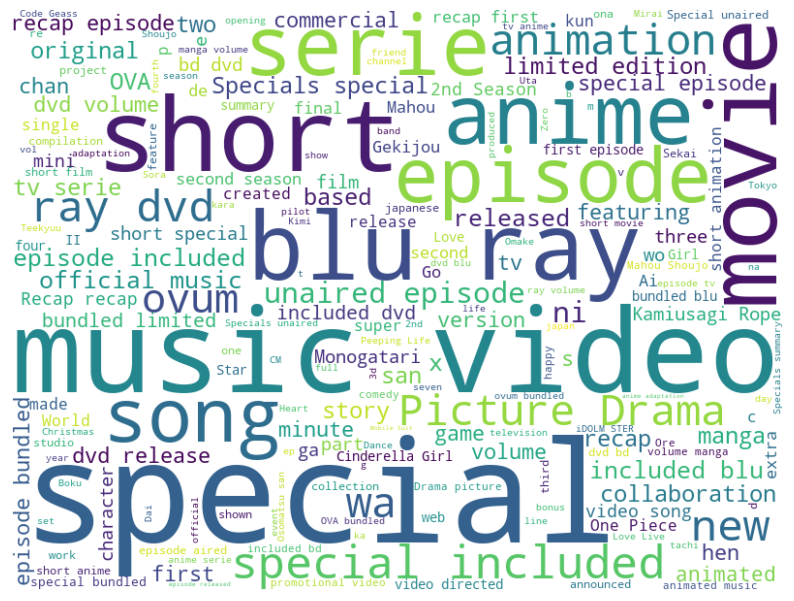

In [216]:
from wordcloud import WordCloud
topic1 = titleRef[titleRef['Topic'] == 1]['synopsis'].to_string()

# Generate the WordCloud from the topic
wordcloud = WordCloud(background_color='white', width=800, height=600).generate(topic1)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

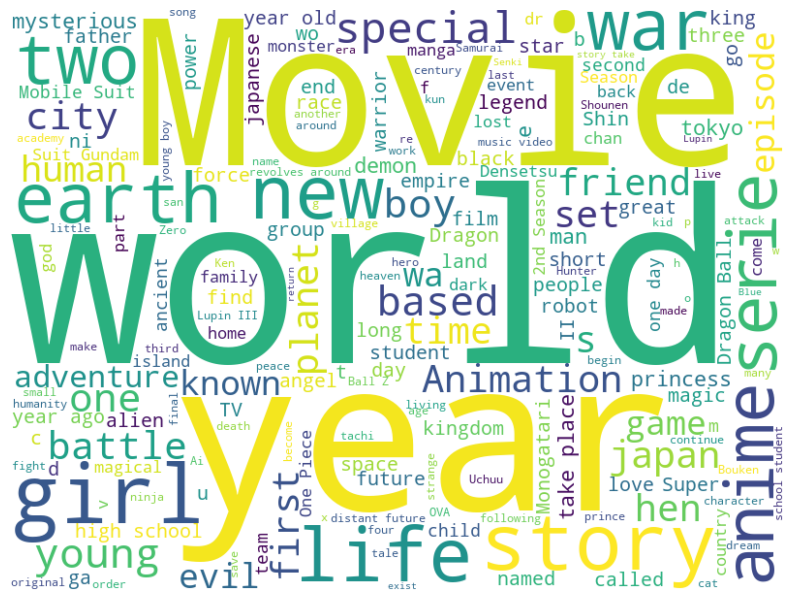

In [217]:
topic2 = titleRef[titleRef['Topic'] == 2]['synopsis'].to_string()

# Generate the WordCloud from the topic
wordcloud = WordCloud(background_color='white', width=800, height=600).generate(topic2)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

A wordcloud was generated for the first two topics of the dataset. There are a total of 12 topics, but I wanted to show the first two as a general example as to what the other topics may look like.

In [219]:
#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [220]:
#Construct the required TF-IDF matrix by applying the fit_transform method on the synopsis feature
tfidf_matrix = tfidf.fit_transform(dfAnime['synopsis'])

In [221]:
#Output the shape of tfidf_matrix
tfidf_matrix.shape

(15071, 43476)

In [222]:
print(tfidf_matrix)

  (0, 27029)	0.1264310543049296
  (0, 38907)	0.10770031756209243
  (0, 33935)	0.13359819485536836
  (0, 6690)	0.06777622336722225
  (0, 42028)	0.041689924014498704
  (0, 19000)	0.13359819485536836
  (0, 2321)	0.10564339704786793
  (0, 2579)	0.13928707435339704
  (0, 17582)	0.07295944442098642
  (0, 27121)	0.053807068902687286
  (0, 27372)	0.09725544309387608
  (0, 12973)	0.10129176733286523
  (0, 27798)	0.08439942304540864
  (0, 15502)	0.10629609627623833
  (0, 39205)	0.07554236235844623
  (0, 9419)	0.09560288783483654
  (0, 33938)	0.0995356654547477
  (0, 21704)	0.06807983188282256
  (0, 23742)	0.06416460336238884
  (0, 14593)	0.0979751138250746
  (0, 33737)	0.09657089253922048
  (0, 41027)	0.08439942304540864
  (0, 6039)	0.07346510286525092
  (0, 12080)	0.08940375198878173
  (0, 4459)	0.11818411162032184
  :	:
  (15070, 29837)	0.09472627189897857
  (15070, 13169)	0.05440837318142335
  (15070, 14427)	0.08000231205425969
  (15070, 31185)	0.07126402230927895
  (15070, 8613)	0.0950965319

In [223]:
# Import linear_kernel to compute the dot product
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix. 
# Once we import the linear_kernel we can use it to do the cosine similarity applying
# the dot product between itself
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [224]:
cosine_sim

array([[1.        , 0.02132299, 0.01398675, ..., 0.00223889, 0.00140896,
        0.00943355],
       [0.02132299, 1.        , 0.00339917, ..., 0.00490667, 0.00367896,
        0.        ],
       [0.01398675, 0.00339917, 1.        , ..., 0.02336893, 0.00431344,
        0.0132718 ],
       ...,
       [0.00223889, 0.00490667, 0.02336893, ..., 1.        , 0.00769351,
        0.00480715],
       [0.00140896, 0.00367896, 0.00431344, ..., 0.00769351, 1.        ,
        0.        ],
       [0.00943355, 0.        , 0.0132718 , ..., 0.00480715, 0.        ,
        1.        ]])

A cosine similary matrix is essentially a square matrix that is used to measure the similarity between a set of vectors. Cosine similarity is needed to find items that are similar to a given item. This is the basis of our recommender list.

### Construct a reverse mapping of indices and movie titles, and drop duplicate titles, if any.

In [227]:
#Construct a reverse mapping of indices and movie titles, and drop duplicate titles, if any
indices = pd.Series(dfAnime.index, index=dfAnime['title']).drop_duplicates()

indices

title
Haikyuu!! Second Season                                              0
Shigatsu wa Kimi no Uso                                              1
Made in Abyss                                                        2
Fullmetal Alchemist: Brotherhood                                     3
Kizumonogatari III: Reiketsu-hen                                     4
                                                                 ...  
Naruto x UT                                                      15066
Miira no Kaikata                                                 15067
Shinryaku!? Ika Musume                                           15068
Kingsglaive: Final Fantasy XV                                    15069
Chuunibyou demo Koi ga Shitai!: Kirameki no... Slapstick Noel    15070
Length: 15071, dtype: int64

### Function to retrieve the top 10 most similar animes

In [229]:
# Function that takes in anime title as input and gives recommendations 
def content_recommender(title, cosine_sim = cosine_sim, df = dfAnime, indices = indices):
    if title not in indices:
        return "Title not found within the dataset."
    
    # Obtain the index of the anime that matches the title
    idx = indices.get(title)
    
    # Get the pairwsie similarity scores of all animes with that anime
    # And convert it into a list of tuples as described above
    sim_scores = list(enumerate(cosine_sim[idx].flatten()))

    # Sort the movies based on the cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies. Ignore the first movie, because the first movie 
    # is itself
    sim_scores = [score for score in sim_scores if score[0] != idx]

    # Get the movie indices using a for loop
    anime_indices = [i[0] for i in sim_scores[:10]]

        # Debug: Print the indices we are trying to access
    print("Anime indices:", anime_indices)

    # Ensure indices are valid before trying to access df
    if any(index >= len(df) for index in anime_indices):
        print("Error: One or more indices are out of bounds.")

    #retrieve titles and links
    recommended_titles = df['title'].iloc[anime_indices].tolist()
    recommended_links = df['link'].iloc[anime_indices].tolist()


    # Return the top 10 most similar movies
    return list(zip(recommended_titles, recommended_links))

In [230]:
content_recommender('Haikyuu!! Second Season')

Anime indices: [10, 719, 8959, 13565, 10015, 6602, 2886, 2368, 1633, 2310]


[('Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou',
  'https://myanimelist.net/anime/32935/Haikyuu__Karasuno_Koukou_vs_Shiratorizawa_Gakuen_Koukou'),
 ('Haikyuu!!', 'https://myanimelist.net/anime/20583/Haikyuu'),
 ('Attacker You!', 'https://myanimelist.net/anime/3081/Attacker_You'),
 ('Attack No.1 (1970)', 'https://myanimelist.net/anime/9163/Attack_No1_1970'),
 ('Ashita e Attack!', 'https://myanimelist.net/anime/4339/Ashita_e_Attack'),
 ('Attack No.1', 'https://myanimelist.net/anime/1550/Attack_No1'),
 ('Shoujo Fight: Norainu-tachi no Odekake',
  'https://myanimelist.net/anime/7092/Shoujo_Fight__Norainu-tachi_no_Odekake'),
 ('Mini Skirt Gakuen', 'https://myanimelist.net/anime/2990/Mini_Skirt_Gakuen'),
 ('Kaette Kita Court no Naka no Tenshi-tachi',
  'https://myanimelist.net/anime/1513/Kaette_Kita_Court_no_Naka_no_Tenshi-tachi'),
 ('Court no Naka no Tenshi-tachi',
  'https://myanimelist.net/anime/1512/Court_no_Naka_no_Tenshi-tachi')]

In [231]:
content_recommender('Made in Abyss')

Anime indices: [887, 375, 2878, 12207, 224, 11469, 5726, 6788, 5430, 14667]


[('Pandora Hearts', 'https://myanimelist.net/anime/5530/Pandora_Hearts'),
 ('Tsumiki no Ie', 'https://myanimelist.net/anime/5365/Tsumiki_no_Ie'),
 ('Mahoutsukai Precure!',
  'https://myanimelist.net/anime/31884/Mahoutsukai_Precure'),
 ('Whistle! (ONA)', 'https://myanimelist.net/anime/34022/Whistle_ONA'),
 ('Jigoku Shoujo Futakomori',
  'https://myanimelist.net/anime/1594/Jigoku_Shoujo_Futakomori'),
 ('Gundam Build Divers',
  'https://myanimelist.net/anime/37245/Gundam_Build_Divers'),
 ('Gundam Build Divers Re:Rise',
  'https://myanimelist.net/anime/40192/Gundam_Build_Divers_Re_Rise'),
 ('Yasashii Fue, Tori, Ishi',
  'https://myanimelist.net/anime/29905/Yasashii_Fue_Tori_Ishi'),
 ('Plunderer', 'https://myanimelist.net/anime/37345/Plunderer'),
 ('Tales of the Abyss',
  'https://myanimelist.net/anime/4884/Tales_of_the_Abyss')]